In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import pygmt
import numpy as np
import datetime as dt

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy_geopd/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
def day_of_year(dts): 
    if isinstance(dts,pd.Timestamp):
        return (dts-pd.Timestamp(dt.datetime(dts.year-1,12,31))).days
    elif hasattr(dts,'__len__') and not isinstance(dts,str): # assume array of datetimes
        return np.array([day_of_year(el) for el in dts])
    elif pd.isnull(dts):
        return np.nan
    else:
        raise TypeError('bad type: ', type(dts))

### ! skip to reload

In [3]:
df_ctd=pd.read_csv('/fs/site5/eccc/crd/ccrn/users/rpg002/stat_downscaling-workshop/data/lineP_ctds/lineP_CTD_training.csv',skiprows=24)
df_ctd['Sta']=[int(el[1:]) for el in df_ctd.STATION_ID.values[:]]
tdt=[dt.datetime.strptime(el,'%Y-%m-%d %H:%M:%S') for el in df_ctd.TIME]
df_ctd['tpd']=[dt.datetime.strptime(el,'%Y-%m-%d %H:%M:%S') for el in df_ctd.TIME]
df_ctd['YM']=[f"{el.year}{el.month:02}" for el in df_ctd['tpd']]
df_ctd['yearday']=day_of_year(df_ctd.tpd)
df_ctd['sin_yearday']=np.sin(df_ctd.yearday/365.25*np.pi/180)
df_ctd['cos_yearday']=np.cos(df_ctd.yearday/365.25*np.pi/180)
df_ctd.sort_values(by='tpd',inplace=True)
df_ctd

,STATION_ID,TIME,LATITUDE,LONGITUDE,DEPTH,PRESSURE,PRESSURE_BIN_CNTR,TEMPERATURE,SALINITY,OXYGEN_MMOL_M3,OXYGEN_UMOL_KG,Sta,tpd,YM,yearday,sin_yearday,cos_yearday
1189,P18,1969-02-23 19:54:00,49.433334,-136.666672,949.999993,960.381400,960.5,3.0400,34.3600,NaN,NaN,18,1969-02-23 19:54:00,196902,54,0.002580,0.999997
1190,P18,1969-02-23 19:54:00,49.433334,-136.666672,1200.000056,1213.845700,1213.5,2.6800,34.4400,NaN,NaN,18,1969-02-23 19:54:00,196902,54,0.002580,0.999997
1188,P18,1969-02-23 19:54:00,49.433334,-136.666672,170.000010,171.532200,171.5,4.6700,33.6100,NaN,NaN,18,1969-02-23 19:54:00,196902,54,0.002580,0.999997
1187,P18,1969-02-23 19:54:00,49.433334,-136.666672,30.000000,30.260023,30.5,5.2800,32.5300,NaN,NaN,18,1969-02-23 19:54:00,196902,54,0.002580,0.999997
2024,P22,1969-02-24 09:42:00,49.700001,-140.666672,139.999999,141.254880,141.5,4.5400,33.3200,NaN,NaN,22,1969-02-24 09:42:00,196902,55,0.002628,0.999997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229341,P4,2020-08-24 05:15:48,48.649502,-126.664169,1129.247563,1142.000000,1142.5,3.2782,34.4227,13.380,12.9,4,2020-08-24 05:15:48,202008,237,0.011325,0.999936
5229342,P4,2020-08-24 05:15:48,48.649502,-126.664169,1130.233708,1143.000000,1143.5,3.2736,34.4228,12.934,12.8,4,2020-08-24 05:15:48,202008,237,0.011325,0.999936
5229343,P4,2020-08-24 05:15:48,48.649502,-126.664169,1131.318462,1144.100000,1144.5,3.2684,34.4230,12.934,12.7,4,2020-08-24 05:15:48,202008,237,0.011325,0.999936
5229336,P4,2020-08-24 05:15:48,48.649502,-126.664169,1124.316768,1137.000000,1137.5,3.2863,34.4217,12.934,12.5,4,2020-08-24 05:15:48,202008,237,0.011325,0.999936


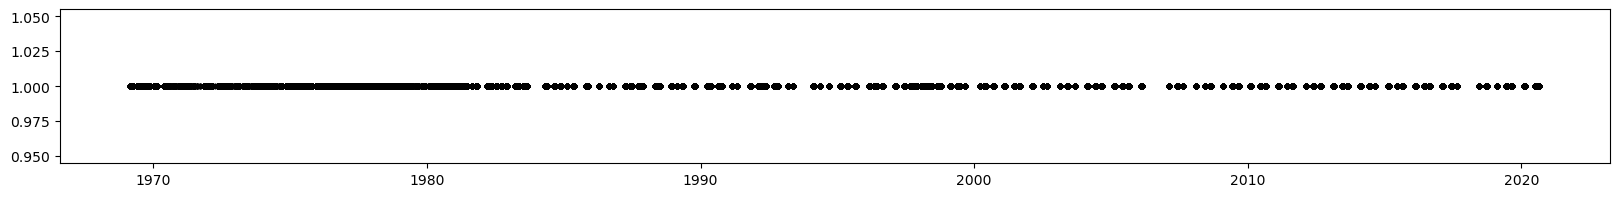

In [5]:
fig,ax=plt.subplots(1,1,figsize=(20,2))
ax.plot(df_ctd.tpd.values,np.ones(len(df_ctd.tpd.values)),'k.')

In [6]:
tdays=[(el-pd.Timestamp(dt.datetime(1950,1,1))).total_seconds()/(24*3600) for el in df_ctd.tpd]

In [7]:
tdiff=np.diff(tdays)
tdifflow=tdiff[tdiff<25]

(-20.0, 20.0)

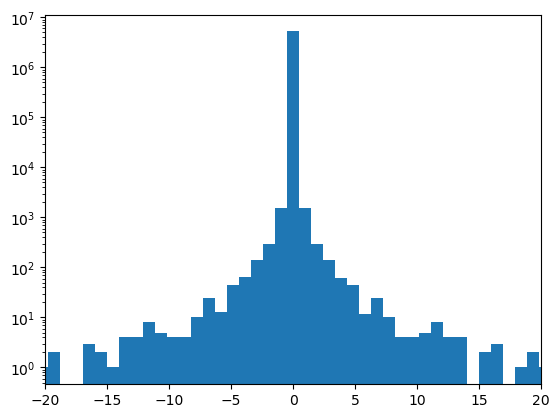

In [8]:
plt.hist(np.diff(tdifflow),51,log=True)
plt.xlim(-20,20)

In [9]:
t_thresh=5 # number of sample-free days after which to assign a new cruise number

In [28]:
def setcruises(t_thresh):
    count=0
    t_thresh_sec=t_thresh*24*3600
    df_ctd[f'CruiseNo_{t_thresh}']=None
    for ind, row in df_ctd.iterrows():
        count=count+1
        if count==1:
            cruiseNo=1
        else:
            if (row['tpd']-tlast).total_seconds()>t_thresh_sec:
                cruiseNo=cruiseNo+1
        tlast=row['tpd']
        df_ctd.at[ind,f'CruiseNo_{t_thresh}']=cruiseNo
    return

### check stations per cruise vs t_thresh

In [39]:
for t_thresh in range(2,10):
    setcruises(t_thresh)

In [40]:
hists=()
hists=()
for t_thresh in range(2,10):
    dfcheck=df_ctd.loc[:,[f'CruiseNo_{t_thresh}','Sta']].groupby([f'CruiseNo_{t_thresh}','Sta']).mean().reset_index().groupby(f'CruiseNo_{t_thresh}').count()
    hist,bins=np.histogram(dfcheck.Sta,bins=100,range=[0,99])
    hists=hists+(hist,)
    hist,bins=np.histogram(dfcheck.Sta,bins=100,range=[0,100])

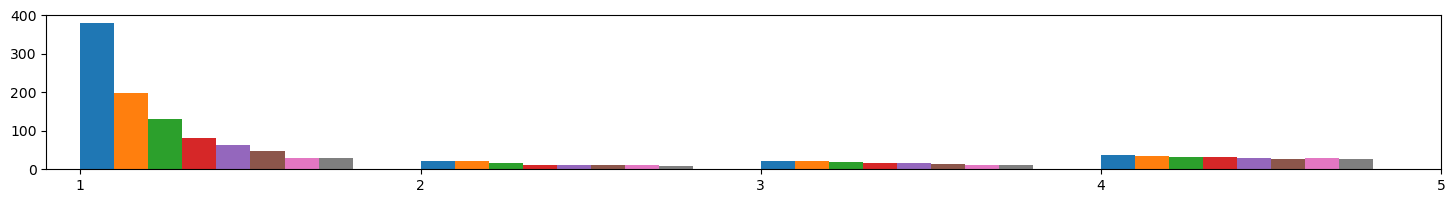

In [42]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
width=.1
for ii in range(0,8):
    offset=width*(ii+.5)
    rects=ax.bar(bins[:-1]+offset,hists[ii],width,label=str(ii+2))
ax.set_xlim(0.9,5)
ax.set_xticks([1,2,3,4,5]);

(0.0, 50.0)

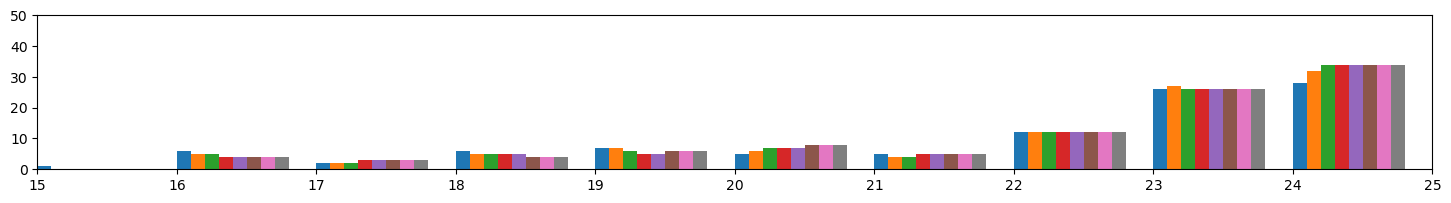

In [43]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
width=.1
for ii in range(0,8):
    offset=width*(ii+.5)
    rects=ax.bar(bins[:-1]+offset,hists[ii],width,label=str(ii+2))
ax.set_xlim(15,25)
ax.set_xticks(np.arange(15,26));
ax.set_ylim(0,50)

### check cruise duration versus t_thresh

In [62]:
histsD=()
for t_thresh in range(2,10):
    dfcheck=df_ctd.loc[:,[f'CruiseNo_{t_thresh}','tpd']].groupby(f'CruiseNo_{t_thresh}').agg(
        tmin=pd.NamedAgg(column="tpd", aggfunc="min"),
        tmax=pd.NamedAgg(column="tpd", aggfunc="max"),
        dur =pd.NamedAgg(column="tpd", aggfunc=lambda x: (x.max()-x.min()).total_seconds()/(24*3600)))
    print(dfcheck.dur.max())
    hist,binsD=np.histogram(dfcheck.dur,bins=50,range=[0,402])
    histsD=histsD+(hist,)

158.9875
203.14583333333334
203.14583333333334
207.87083333333334
255.7
401.01666666666665
401.01666666666665
401.01666666666665


(0.0, 5.0)

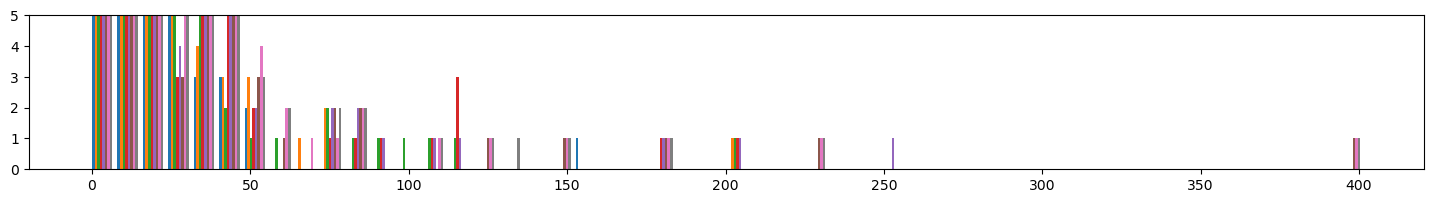

In [64]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
width=.1*8
for ii in range(0,8):
    offset=width*(ii+.5)
    rects=ax.bar(binsD[:-1]+offset,histsD[ii],width,label=str(ii+2))
# ax.set_xlim(0.9,5)
#ax.set_xticks(np.arange(1,100,5));
ax.set_ylim(0,5)

(0.0, 20.0)

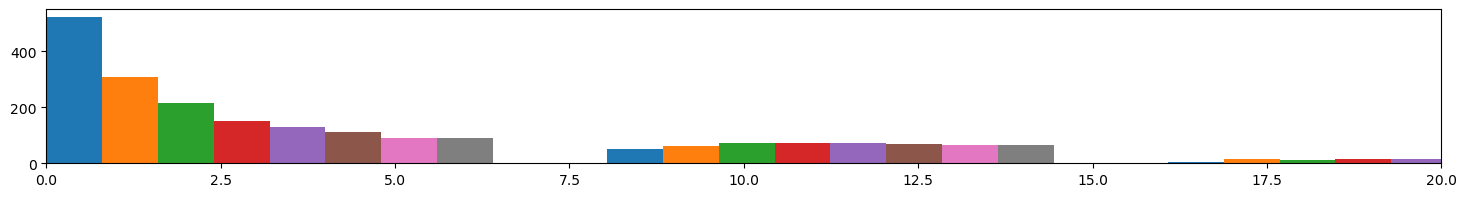

In [66]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
width=.1*8
for ii in range(0,8):
    offset=width*(ii+.5)
    rects=ax.bar(binsD[:-1]+offset,histsD[ii],width,label=str(ii+2))
ax.set_xlim(0,20)
#ax.set_xticks(np.arange(1,100,5));


(0.0, 5.0)

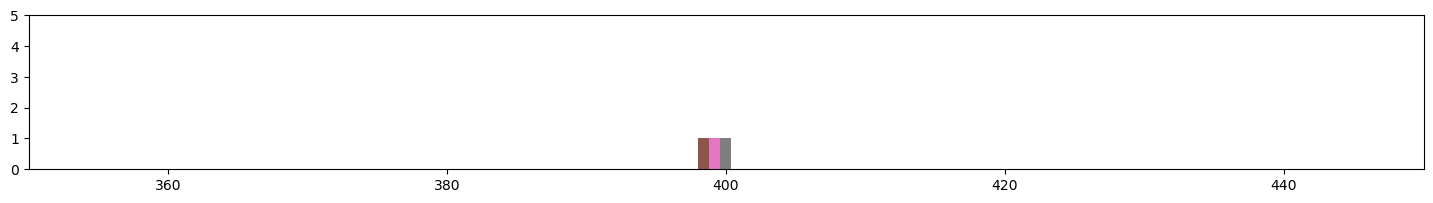

In [71]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
width=.1*8
for ii in range(0,8):
    offset=width*(ii+.5)
    rects=ax.bar(binsD[:-1]+offset,histsD[ii],width,label=str(ii+2))
ax.set_xlim(350,450)
ax.set_ylim(0,5)

### choose t_thresh=6 days

(array([214.,  20.,   2.,   3.,   2.,   0.,   0.,   1.,   1.,   1.]),
 array([  0.  ,  25.57,  51.14,  76.71, 102.28, 127.85, 153.42, 178.99,
        204.56, 230.13, 255.7 ]),
 <BarContainer object of 10 artists>)

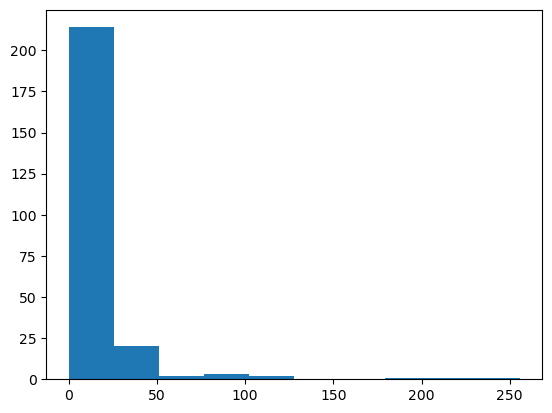

In [86]:
t_thresh=6
dfcheck6=df_ctd.loc[:,[f'CruiseNo_{t_thresh}','tpd']].groupby(f'CruiseNo_{t_thresh}').agg(
        tmin=pd.NamedAgg(column="tpd", aggfunc="min"),
        tmax=pd.NamedAgg(column="tpd", aggfunc="max"),
        dur =pd.NamedAgg(column="tpd", aggfunc=lambda x: (x.max()-x.min()).total_seconds()/(24*3600)))
plt.hist(dfcheck6['dur'])

In [87]:
dfcheck6.loc[dfcheck6.dur>200]

,tmin,tmax,dur
CruiseNo_6,,,
79,1977-11-24 00:30:00,1978-08-06 17:18:00,255.700000
88,1980-02-20 02:18:00,1980-09-14 23:12:00,207.870833


In [88]:
pd.set_option('display.max_rows', 1000)

In [89]:
df_ctd.loc[df_ctd.CruiseNo_6==79,['yearday','STATION_ID']].groupby(['yearday','STATION_ID']).mean()

Empty DataFrame
Columns: []
Index: [(2, P26), (3, P26), (4, P26), (5, P26), (8, P16), (9, P16), (9, P26), (10, P26), (11, P26), (13, P26), (14, P26), (15, P26), (16, P26), (17, P26), (18, P26), (19, P26), (20, P26), (21, P26), (22, P26), (24, P26), (25, P26), (26, P26), (27, P26), (28, P26), (29, P26), (30, P26), (31, P26), (32, P26), (33, P26), (34, P26), (35, P26), (36, P26), (37, P26), (41, P26), (42, P26), (43, P20), (43, P26), (44, P18), (44, P20), (44, P26), (46, P26), (47, P26), (48, P26), (50, P26), (51, P26), (53, P26), (54, P26), (55, P26), (56, P26), (57, P26), (58, P26), (59, P26), (60, P26), (61, P26), (62, P26), (63, P26), (64, P26), (65, P26), (66, P26), (67, P26), (68, P26), (69, P26), (70, P26), (71, P26), (72, P26), (73, P26), (74, P26), (75, P26), (76, P26), (77, P26), (82, P26), (83, P26), (84, P26), (85, P18), (86, P16), (86, P18), (86, P20), (87, P26), (88, P26), (89, P26), (90, P26), (91, P26), (92, P26), (93, P26), (98, P26), (100, P26), (101, P26), (102, P26), (103, P26), (104, P26), (105, P26), (107, P26), (108, P26), (109, P26), (110, P26), (111, P26), (112, P26), (113, P26), (114, P26), (115, P26), ...]

In [90]:
# decision: arbitrarily split "cruises" longer than 30 days into maximum 30 day sub-cruises

In [102]:
dfcheck6.head(3)

,tmin,tmax,dur
CruiseNo_6,,,
1,1969-02-23 19:54:00,1969-03-09 21:36:00,14.070833
2,1969-03-16 20:36:00,1969-03-28 20:12:00,11.983333
3,1969-04-03 21:12:00,1969-04-07 20:06:00,3.954167


In [115]:
df_ctd.CruiseNo=None
for ind, row in dfcheck6.iterrows(): # index is CruiseNo_6
    if row['dur']<=30: # assign existing cruise number
        df_ctd.loc[df_ctd[f'CruiseNo_{t_thresh}']==ind,'CruiseNo']=ind
    if row['dur']>30: # split cruise
        splits=int(row['dur']/30)+1
        splitdur=(row['tmax']-row['tmin'])/splits
        for iseg in range(0,splits):
            t0=row['tmin']+iseg*splitdur
            t1=row['tmin']+(iseg+1)*splitdur
            if iseg==splits-1: t1=row['tmax']
            df_ctd.loc[(df_ctd[f'CruiseNo_{t_thresh}']==ind)&(df_ctd.tpd>=t0)&(df_ctd.tpd<=t1),'CruiseNo']=float(f"{ind}.{iseg}")

(array([60., 32., 46., 35., 28., 15., 18., 21., 17., 27.]),
 array([ 0.        ,  2.98541667,  5.97083333,  8.95625   , 11.94166667,
        14.92708333, 17.9125    , 20.89791667, 23.88333333, 26.86875   ,
        29.85416667]),
 <BarContainer object of 10 artists>)

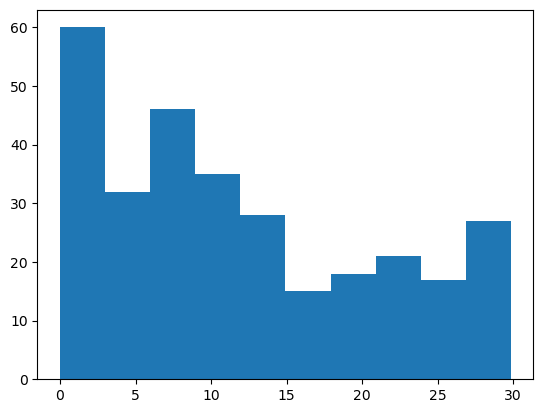

In [116]:
dfcheck=df_ctd.loc[:,['CruiseNo','tpd']].groupby('CruiseNo').agg(
        tmin=pd.NamedAgg(column="tpd", aggfunc="min"),
        tmax=pd.NamedAgg(column="tpd", aggfunc="max"),
        dur =pd.NamedAgg(column="tpd", aggfunc=lambda x: (x.max()-x.min()).total_seconds()/(24*3600)))
plt.hist(dfcheck['dur'])

In [114]:
dfcheck.loc[dfcheck.dur>30]

,tmin,tmax,dur
CruiseNo,,,
6.0,1969-07-01 08:42:00,1969-08-04 23:24:00,34.612500
7.0,1969-08-13 17:30:00,1969-09-25 19:00:00,43.062500
13.0,1970-01-21 21:30:00,1970-02-23 19:00:00,32.895833
17.0,1970-06-30 18:00:00,1970-08-08 17:24:00,38.975000
18.0,1970-09-20 11:30:00,1970-10-20 18:00:00,30.270833
31.0,1971-11-02 22:00:00,1971-12-07 01:42:00,34.154167
36.0,1972-06-25 08:30:00,1972-07-26 18:12:00,31.404167
36.1,1972-07-27 18:00:00,1972-08-26 18:30:00,30.020833
48.0,1973-08-05 17:12:00,1973-09-18 05:24:00,43.508333


In [118]:
df_ctd['tpd_cruise']=None
for icruise in df_ctd.CruiseNo.unique():
    idf=df_ctd.loc[df_ctd.CruiseNo==icruise]
    tpd_cruise=idf.tpd.mean()
    df_ctd.loc[df_ctd.CruiseNo==icruise,'tpd_cruise']=tpd_cruise

### save

In [ ]:
df_ctd.to_csv('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/StatDownOc/data/modified/df_ctd.csv',)

### reload

In [3]:
df_ctd=pd.read_csv('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/StatDownOc/data/modified/df_ctd.csv')

In [4]:
df_ctd

,Unnamed: 0,STATION_ID,TIME,LATITUDE,LONGITUDE,DEPTH,PRESSURE,PRESSURE_BIN_CNTR,TEMPERATURE,SALINITY,...,CruiseNo,CruiseNo_2,CruiseNo_3,CruiseNo_4,CruiseNo_5,CruiseNo_6,CruiseNo_7,CruiseNo_8,CruiseNo_9,tpd_cruise
0,1189,P18,1969-02-23 19:54:00,49.433334,-136.666672,949.999993,960.381400,960.5,3.0400,34.3600,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
1,1190,P18,1969-02-23 19:54:00,49.433334,-136.666672,1200.000056,1213.845700,1213.5,2.6800,34.4400,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
2,1188,P18,1969-02-23 19:54:00,49.433334,-136.666672,170.000010,171.532200,171.5,4.6700,33.6100,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
3,1187,P18,1969-02-23 19:54:00,49.433334,-136.666672,30.000000,30.260023,30.5,5.2800,32.5300,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
4,2024,P22,1969-02-24 09:42:00,49.700001,-140.666672,139.999999,141.254880,141.5,4.5400,33.3200,...,1.0,1,1,1,1,1,1,1,1,1969-03-05 10:51:52.440944880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233798,5229341,P4,2020-08-24 05:15:48,48.649502,-126.664169,1129.247563,1142.000000,1142.5,3.2782,34.4227,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296
5233799,5229342,P4,2020-08-24 05:15:48,48.649502,-126.664169,1130.233708,1143.000000,1143.5,3.2736,34.4228,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296
5233800,5229343,P4,2020-08-24 05:15:48,48.649502,-126.664169,1131.318462,1144.100000,1144.5,3.2684,34.4230,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296
5233801,5229336,P4,2020-08-24 05:15:48,48.649502,-126.664169,1124.316768,1137.000000,1137.5,3.2863,34.4217,...,244.0,599,407,326,266,244,223,203,199,2020-08-17 17:18:31.654615296


In [8]:
df_ctd['tpd_cruise']=[pd.Timestamp(el) for el in df_ctd['tpd_cruise']]
df_ctd['yearday_cruise']=day_of_year(df_ctd.tpd_cruise)
df_ctd['sin_yearday_cruise']=np.sin(df_ctd.yearday_cruise/365.25*np.pi/180)
df_ctd['cos_yearday_cruise']=np.cos(df_ctd.yearday_cruise/365.25*np.pi/180)

In [23]:
np.max(df_ctd.PRESSURE),np.min(df_ctd.PRESSURE)

(np.float64(4325.6), np.float64(0.0))

(4200.0, 4300.0)

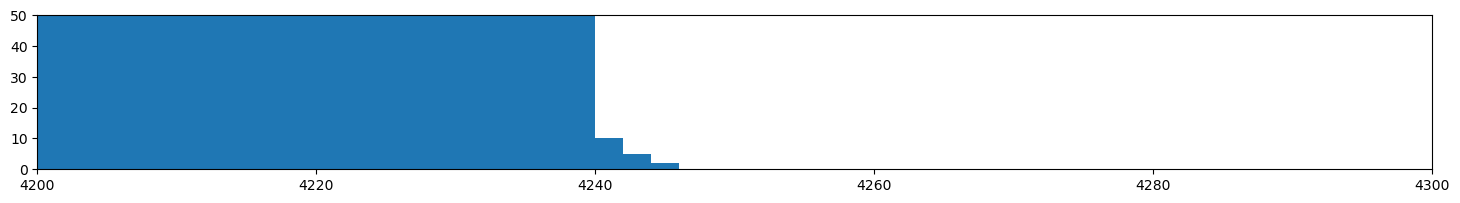

In [24]:
fig,ax=plt.subplots(1,1,figsize=(18,2))
ax.hist(df_ctd.DEPTH,np.arange(0,4255,2))
ax.set_ylim(0,50)
ax.set_xlim(4200,4300)

In [28]:
z_edges=np.arange(0,4001,5) # 0 to 4000 inclusive

In [41]:
z_noms=(z_edges[:-1]+z_edges[1:])/2

In [42]:
z_inds=np.digitize(df_ctd.DEPTH.values,z_edges)

In [43]:
np.unique(z_inds)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [44]:
z_noms=np.append(z_noms,[None,],axis=0)
z_noms

array([2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5, 102.5, 107.5,
       112.5, 117.5, 122.5, 127.5, 132.5, 137.5, 142.5, 147.5, 152.5,
       157.5, 162.5, 167.5, 172.5, 177.5, 182.5, 187.5, 192.5, 197.5,
       202.5, 207.5, 212.5, 217.5, 222.5, 227.5, 232.5, 237.5, 242.5,
       247.5, 252.5, 257.5, 262.5, 267.5, 272.5, 277.5, 282.5, 287.5,
       292.5, 297.5, 302.5, 307.5, 312.5, 317.5, 322.5, 327.5, 332.5,
       337.5, 342.5, 347.5, 352.5, 357.5, 362.5, 367.5, 372.5, 377.5,
       382.5, 387.5, 392.5, 397.5, 402.5, 407.5, 412.5, 417.5, 422.5,
       427.5, 432.5, 437.5, 442.5, 447.5, 452.5, 457.5, 462.5, 467.5,
       472.5, 477.5, 482.5, 487.5, 492.5, 497.5, 502.5, 507.5, 512.5,
       517.5, 522.5, 527.5, 532.5, 537.5, 542.5, 547.5, 552.5, 557.5,
       562.5, 567.5, 572.5, 577.5, 582.5, 587.5, 592.5, 597.5, 602.5,
       607.5, 612.5, 617.5, 622.5, 627.5, 632.5, 637.5, 642.5, 647.5,
       652.5, 

In [47]:
df_ctd['z_nom']=[z_noms[el-1] for el in z_inds] # digitize indexes starting at 1 instead of zero

In [74]:
df_ctd_out.columns

Index(['CruiseNo', 'Sta', 'tpd_cruise', 'yearday_cruise', 'sin_yearday_cruise',
       'cos_yearday_cruise', 'z_nom', 'TEMPERATURE', 'SALINITY',
       'OXYGEN_MMOL_M3', 'OXYGEN_UMOL_KG'],
      dtype='object')

In [48]:
df_ctd.columns

Index(['Unnamed: 0', 'STATION_ID', 'TIME', 'LATITUDE', 'LONGITUDE', 'DEPTH',
       'PRESSURE', 'PRESSURE_BIN_CNTR', 'TEMPERATURE', 'SALINITY',
       'OXYGEN_MMOL_M3', 'OXYGEN_UMOL_KG', 'Sta', 'tpd', 'YM', 'yearday',
       'sin_yearday', 'cos_yearday', 'CruiseNo', 'CruiseNo_2', 'CruiseNo_3',
       'CruiseNo_4', 'CruiseNo_5', 'CruiseNo_6', 'CruiseNo_7', 'CruiseNo_8',
       'CruiseNo_9', 'tpd_cruise', 'yearday_cruise', 'sin_yearday_cruise',
       'cos_yearday_cruise', 'z_nom'],
      dtype='object')

In [65]:
df_ctd_out=df_ctd.loc[df_ctd.z_nom>0,['CruiseNo','Sta','tpd_cruise','yearday_cruise','sin_yearday_cruise','cos_yearday_cruise','z_nom','TEMPERATURE','SALINITY','OXYGEN_MMOL_M3','OXYGEN_UMOL_KG']].groupby(['CruiseNo','Sta','tpd_cruise','yearday_cruise','sin_yearday_cruise','cos_yearday_cruise','z_nom',]).mean().reset_index()

In [66]:
df_ctd_out

,CruiseNo,Sta,tpd_cruise,yearday_cruise,sin_yearday_cruise,cos_yearday_cruise,z_nom,TEMPERATURE,SALINITY,OXYGEN_MMOL_M3,OXYGEN_UMOL_KG
0,1.0,18,1969-03-05 10:51:52.440944880,64,0.003058,0.999995,32.5,5.280000,32.53000,NaN,NaN
1,1.0,18,1969-03-05 10:51:52.440944880,64,0.003058,0.999995,172.5,4.670000,33.61000,NaN,NaN
2,1.0,18,1969-03-05 10:51:52.440944880,64,0.003058,0.999995,947.5,3.040000,34.36000,NaN,NaN
3,1.0,18,1969-03-05 10:51:52.440944880,64,0.003058,0.999995,1202.5,2.680000,34.44000,NaN,NaN
4,1.0,22,1969-03-05 10:51:52.440944880,64,0.003058,0.999995,137.5,4.540000,33.32000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
971271,244.0,35,2020-08-17 17:18:31.654615296,230,0.010990,0.999940,1962.5,1.990920,34.57418,49.9520,48.720
971272,244.0,35,2020-08-17 17:18:31.654615296,230,0.010990,0.999940,1967.5,1.988375,34.57470,50.3980,49.075
971273,244.0,35,2020-08-17 17:18:31.654615296,230,0.010990,0.999940,1972.5,1.984340,34.57550,50.3980,49.020
971274,244.0,35,2020-08-17 17:18:31.654615296,230,0.010990,0.999940,1977.5,1.980720,34.57620,51.0224,49.700


In [68]:
len(df_ctd_out.tpd_cruise.unique()),len(df_ctd.CruiseNo.unique()),len(df_ctd.tpd_cruise.unique()),len(df_ctd_out.tpd_cruise.unique())

(299, 299, 299, 299)

In [70]:
gridSpecs=pd.read_csv('gridspecs.csv')
gridSpecs.columns

Index(['Unnamed: 0', 'nom_lon', 'nom_lat', 'lonedges_lo', 'lonedges_hi',
       'latedges_lo', 'latedges_hi', 'Sta', 'StaLon', 'StaLat', 'Index'],
      dtype='object')

In [72]:
x=gridSpecs.Index
len(x)

38

In [75]:
stas=df_ctd_out.Sta.unique()

In [73]:
z=z_noms[:-1]
len(z)

800

In [ ]:
times=df_all.tpd_cruise.unique()
#cruises=df_all.CruiseNo.unique()

In [ ]:
df_ctd_out=df_ctd_out.rename(columns={
            "TEMPERATURE": "Temperature",
            "SALINITY": "Salinity",
            "OXYGEN_UMOL_KG": "Oxygen_umolkg",
            "OXYGEN_MMOL_M3": "Oxygen_mmol_m3",
        })

In [ ]:
variables = ["Temperature", "Salinity", "Oxygen_umolkg", "Oxygen_mmol_m3","Latitude", "Longitude"]
data_dict = {var: np.full((len(times), len(x), len(z)), np.nan) for var in variables}

In [ ]:
for t_idx, t in enumerate(times):
    df_t = df_ctd_out.loc[df_ctd_out["tpd_cruise"] == t]
    for s_idx, s in enumerate(stas):
        df_s = df_t.loc[df_t["Sta"] == s]
        if df_s.empty:
            continue
        depth_idx = np.searchsorted(depths, df_s["Depth"])
        for var in variables:
            valid = (depth_idx >= 0) & (depth_idx < len(depths))
            data_dict[var][t_idx, s_idx, depth_idx[valid]] = df_s[var].values[valid]